In [1]:
import pandas as pd

## Importing the keyword bidding data

In [2]:
df1 = pd.read_csv('ydata-ysm-keyphrase-bid-imp-click-v1_0.tsv', sep='\t')

In [3]:
df1.columns = ['Day','anon_account_id','rank','anon_key_phrase','avg_bid','impressions','clicks']
df1.head()

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks
0,29,08bade48-1081-488f-b459-6c75d75312ae,3,769ed4a87b5010f4 3d4b990abb0867c8 cd74a8342d25...,100.0,1.0,0.0
1,29,08bade48-1081-488f-b459-6c75d75312ae,2,769ed4a87b5010f4 3d4b990abb0867c8 cd74a8342d25...,100.0,1.0,0.0
2,11,08bade48-1081-488f-b459-6c75d75312ae,1,769ed4a87b5010f4 3d4b990abb0867c8 cd74a8342d25...,100.0,2.0,0.0
3,76,08bade48-1081-488f-b459-6c75d75312ae,2,769ed4a87b5010f4 3d4b990abb0867c8 cd74a8342d25...,100.0,1.0,0.0
4,48,08bade48-1081-488f-b459-6c75d75312ae,3,2affa525151b6c51 79021a2e2c836c1a 327e089362aa...,100.0,2.0,0.0


# Importing the keyword category data

In [4]:
df_category = pd.read_csv('ydata-ysm-keyphrase-category-v1_0.txt', sep='\t', encoding='utf-8')
df_category.columns  = ['Category']
df_category.head()

,Category
0,1001140e40fff9fd
1,10024382a4ae7a07
2,1002d06dcd20f283
3,1003306ca93ebfee
4,1004a8c8af63bb5b


## Exploratory Data Analysis

In [5]:
print(len(df1))

77850271


In [6]:
print(len(df_category))

75358


In [6]:
df1['anon_account_id'].nunique()

16268

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77850271 entries, 0 to 77850270
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Day              int64  
 1   anon_account_id  object 
 2   rank             int64  
 3   anon_key_phrase  object 
 4   avg_bid          float64
 5   impressions      float64
 6   clicks           float64
dtypes: float64(3), int64(2), object(2)
memory usage: 4.1+ GB


In [8]:
df1.describe()

,Day,rank,avg_bid,impressions,clicks
count,7.785027e+07,7.785027e+07,7.785027e+07,7.785027e+07,7.785027e+07
mean,5.950302e+01,6.708767e+00,1.045021e+03,1.485267e+01,1.241272e-01
std,3.628809e+01,5.909440e+00,2.618705e+03,6.168073e+02,3.999992e+00
min,1.000000e+00,1.000000e+00,3.000000e+01,1.000000e+00,0.000000e+00
25%,2.800000e+01,3.000000e+00,1.900000e+02,1.000000e+00,0.000000e+00
50%,5.700000e+01,5.000000e+00,3.700000e+02,2.000000e+00,0.000000e+00
75%,9.200000e+01,9.000000e+00,8.400000e+02,4.000000e+00,0.000000e+00
max,1.230000e+02,2.280000e+02,9.999900e+05,1.259886e+06,9.485000e+03


In [9]:
df1[['anon_account_id', 'anon_key_phrase']].describe()

,anon_account_id,anon_key_phrase
count,77850271,77850271
unique,16268,648515
top,f7ae9af5-6316-4c99-9aef-6af6c56cd1e6,aef4ee042bea9c6b fc4f04e287746c48
freq,1436095,549340


In [10]:
df_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75358 entries, 0 to 75357
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  75358 non-null  object
dtypes: object(1)
memory usage: 588.9+ KB


In [11]:
df_category.describe()

,Category
count,75358
unique,75358
top,1001140e40fff9fd
freq,1


## Check if all words in a key-phrase are keywords

In [12]:
df1.loc[:100,'anon_key_phrase'].str.split().apply(lambda x: all(y in list(df_category['Category']) for y in x))

0      True
1      True
2      True
3      True
4      True
       ... 
96     True
97     True
98     True
99     True
100    True
Name: anon_key_phrase, Length: 101, dtype: bool

In [13]:
#all(df1.loc[:10000,'anon_key_phrase'].str.split().apply(lambda x: all(y in list(df_category['Category']) for y in x)))

In [14]:
df1['Day'].nunique()

123

In [15]:
78000000/123

634146.3414634146

In [16]:
df1['anon_key_phrase'].nunique()

648515

In [17]:
df1['anon_key_phrase'].value_counts().head(100)

aef4ee042bea9c6b fc4f04e287746c48                     549340
aef4ee042bea9c6b fc4f04e287746c48 324ac734097de5e4    267893
3db691494440189b                                      193819
aef4ee042bea9c6b ac26bfe54a8a8f38 fc4f04e287746c48    140368
ef28801548f374f9 3db691494440189b                     125389
                                                       ...  
3db691494440189b 4512510da93e340a                      32639
79021a2e2c836c1a 7e37deee250514a6                      32336
de84da9dfd5a336d ec7d97c5f425ebc1                      32193
db4729d363a51a34 79021a2e2c836c1a                      32146
aef4ee042bea9c6b fc4f04e287746c48 bc820051fbd08e13     32105
Name: anon_key_phrase, Length: 100, dtype: int64

In [18]:
df1.loc[df1['anon_key_phrase'] == 'db4729d363a51a34 79021a2e2c836c1a', 'anon_account_id'].value_counts()

b012f8f9-e6f9-4e07-b5e3-b44aca406f91    2217
27ecc6c3-33a6-4837-bf0e-47fb6532623a    1788
a0d952a9-0456-4054-ae62-ddca98013186    1549
9208e2c7-c756-4a17-95ec-d882266457ce    1465
ced6b000-1f63-48ec-99d5-56ab39c34e66    1451
                                        ... 
63648ca0-45d3-441e-9f34-933e596394f9       4
ab9cde8e-8d92-4f1b-9d52-e4da0020d162       3
36c920f3-19c4-4031-be03-f3714352458a       2
83b049a0-5815-4307-9107-2faadf9563a9       1
e1ff582c-634f-469c-b08b-d11a29406ded       1
Name: anon_account_id, Length: 115, dtype: int64

In [19]:
df1.loc[(df1['anon_key_phrase'] == 'db4729d363a51a34 79021a2e2c836c1a') & 
        (df1['anon_account_id'] == 'ced6b000-1f63-48ec-99d5-56ab39c34e66'), 
        'Day'].value_counts()

119    17
37     17
41     16
78     16
74     16
       ..
31     10
5      10
108     9
121     9
97      9
Name: Day, Length: 123, dtype: int64

In [20]:
df1.loc[(df1['anon_key_phrase'] == 'db4729d363a51a34 79021a2e2c836c1a') & 
        (df1['anon_account_id'] == 'ced6b000-1f63-48ec-99d5-56ab39c34e66') & 
        (df1['Day'] == 5), 
        'rank'].value_counts()

6     1
9     1
3     1
11    1
1     1
2     1
4     1
5     1
7     1
8     1
Name: rank, dtype: int64

In [21]:
df1.loc[(df1['anon_key_phrase'] == 'db4729d363a51a34 79021a2e2c836c1a') & 
        (df1['anon_account_id'] == 'b012f8f9-e6f9-4e07-b5e3-b44aca406f91') & 
        (df1['Day'] == 5), 
        ['avg_bid', 'rank']].value_counts()

avg_bid  rank
370.0    1       1
         11      1
         22      1
         17      1
         16      1
         15      1
         14      1
         13      1
         12      1
         10      1
         2       1
         9       1
         8       1
         7       1
         6       1
         5       1
         4       1
         3       1
         23      1
dtype: int64

In [22]:
df1.loc[(df1['anon_key_phrase'] == 'db4729d363a51a34 79021a2e2c836c1a') & 
        (df1['anon_account_id'] == 'b012f8f9-e6f9-4e07-b5e3-b44aca406f91') & 
        (df1['Day'] == 5), 
        'avg_bid'].value_counts()

370.0    19
Name: avg_bid, dtype: int64

In [23]:
df1.loc[(df1['anon_key_phrase'] == 'db4729d363a51a34 79021a2e2c836c1a') & 
        (df1['anon_account_id'] == 'ced6b000-1f63-48ec-99d5-56ab39c34e66') & 
        (df1['Day'] == 5)]

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks
77155016,5,ced6b000-1f63-48ec-99d5-56ab39c34e66,6,db4729d363a51a34 79021a2e2c836c1a,600.0,11.0,0.0
77156318,5,ced6b000-1f63-48ec-99d5-56ab39c34e66,9,db4729d363a51a34 79021a2e2c836c1a,600.0,2.0,0.0
77158483,5,ced6b000-1f63-48ec-99d5-56ab39c34e66,3,db4729d363a51a34 79021a2e2c836c1a,600.0,868.0,3.0
77159266,5,ced6b000-1f63-48ec-99d5-56ab39c34e66,11,db4729d363a51a34 79021a2e2c836c1a,600.0,1.0,0.0
77242335,5,ced6b000-1f63-48ec-99d5-56ab39c34e66,1,db4729d363a51a34 79021a2e2c836c1a,600.0,529.0,7.0
77243722,5,ced6b000-1f63-48ec-99d5-56ab39c34e66,2,db4729d363a51a34 79021a2e2c836c1a,600.0,379.0,2.0
77306836,5,ced6b000-1f63-48ec-99d5-56ab39c34e66,4,db4729d363a51a34 79021a2e2c836c1a,600.0,263.0,0.0
77307623,5,ced6b000-1f63-48ec-99d5-56ab39c34e66,5,db4729d363a51a34 79021a2e2c836c1a,600.0,39.0,0.0
77309112,5,ced6b000-1f63-48ec-99d5-56ab39c34e66,7,db4729d363a51a34 79021a2e2c836c1a,600.0,3.0,0.0
77309323,5,ced6b000-1f63-48ec-99d5-56ab39c34e66,8,db4729d363a51a34 79021a2e2c836c1a,600.0,9.0,0.0


In [24]:
df1.loc[(df1['anon_key_phrase'] == 'db4729d363a51a34 79021a2e2c836c1a') & 
        (df1['anon_account_id'] == 'ced6b000-1f63-48ec-99d5-56ab39c34e66') & 
        (df1['Day'] == 6)]

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks
77146681,6,ced6b000-1f63-48ec-99d5-56ab39c34e66,3,db4729d363a51a34 79021a2e2c836c1a,600.0,361.0,1.0
77146848,6,ced6b000-1f63-48ec-99d5-56ab39c34e66,10,db4729d363a51a34 79021a2e2c836c1a,600.0,5.0,0.0
77149072,6,ced6b000-1f63-48ec-99d5-56ab39c34e66,9,db4729d363a51a34 79021a2e2c836c1a,600.0,2.0,0.0
77160270,6,ced6b000-1f63-48ec-99d5-56ab39c34e66,7,db4729d363a51a34 79021a2e2c836c1a,600.0,3.0,0.0
77187054,6,ced6b000-1f63-48ec-99d5-56ab39c34e66,5,db4729d363a51a34 79021a2e2c836c1a,600.0,13.0,0.0
77187208,6,ced6b000-1f63-48ec-99d5-56ab39c34e66,4,db4729d363a51a34 79021a2e2c836c1a,600.0,44.0,1.0
77188008,6,ced6b000-1f63-48ec-99d5-56ab39c34e66,11,db4729d363a51a34 79021a2e2c836c1a,600.0,1.0,0.0
77188036,6,ced6b000-1f63-48ec-99d5-56ab39c34e66,6,db4729d363a51a34 79021a2e2c836c1a,600.0,8.0,0.0
77215278,6,ced6b000-1f63-48ec-99d5-56ab39c34e66,2,db4729d363a51a34 79021a2e2c836c1a,600.0,632.0,4.0
77215420,6,ced6b000-1f63-48ec-99d5-56ab39c34e66,15,db4729d363a51a34 79021a2e2c836c1a,600.0,1.0,0.0


In [25]:
df1.loc[(df1['anon_key_phrase'] == 'db4729d363a51a34 79021a2e2c836c1a') & 
        (df1['anon_account_id'] == 'ced6b000-1f63-48ec-99d5-56ab39c34e66'), 
        ['Day', 'avg_bid']].value_counts()

Day  avg_bid   
119  170.000000    17
89   200.000000    15
88   200.000000    14
7    600.000000    14
9    600.000000    14
                   ..
69   366.279070     1
     367.582418     1
     368.181818     1
     369.745223     1
123  383.125000     1
Length: 671, dtype: int64

In [26]:
'9208e2c7-c756-4a17-95ec-d882266457ce'

'9208e2c7-c756-4a17-95ec-d882266457ce'

## Picking a random subset of Key-phrases

In [4]:
import numpy as np

In [5]:
key_phrases = pd.DataFrame(df1['anon_key_phrase'].unique(), columns=['keyphrase'])

In [6]:
key_phrases.head()

,keyphrase
0,769ed4a87b5010f4 3d4b990abb0867c8 cd74a8342d25...
1,2affa525151b6c51 79021a2e2c836c1a 327e089362aa...
2,cd74a8342d25d090 e26345b773003589 1b96f206580d...
3,cd74a8342d25d090 1b96f206580d3c18 f5f3353a3902...
4,cd74a8342d25d090 1b96f206580d3c18 f5f3353a3902...


In [7]:
key_phrases.shape

(648515, 1)

In [8]:
indices_to_pick = np.random.randint(648515, size=(1000))
indices_to_pick

array([200128, 548459,  46053, 427087, 470762, 382728, 618992,  30874,
       583410, 400152, 511111,  79311, 416301, 246396, 137395, 528661,
       113492, 476006,  80871, 600926, 112463, 141980, 574717, 238788,
       300906, 606190,  88210,   5032, 453805, 420557, 240035, 235483,
       240238, 470393, 253020, 184838, 598318, 419505, 505993, 560527,
       224045, 621271,  60936, 644005, 616377, 561513, 549345, 113000,
       211430, 111904, 343145, 248236, 236802, 491512, 204536, 234114,
       188117, 488625, 525778,   9609, 350529, 398733,  33840,  97828,
       103880, 222115,   4581, 565231, 206151, 322146, 532301, 566204,
       468964, 530560,  65527,  44024, 519536, 343444, 637329, 431082,
       620971, 105639, 429764, 317205, 384552, 105291,   3621, 456542,
       615490, 113861, 443431, 281681, 235760, 333169, 308277, 115955,
        81038, 302996, 229060,  82324, 627619, 184368, 328505,  71084,
       283157, 544659, 524863, 617252, 360507, 528601, 370545, 434776,
      

In [9]:
phrases_to_pick = key_phrases.loc[indices_to_pick]

In [10]:
phrases_to_pick.shape

(1000, 1)

In [11]:
list(phrases_to_pick['keyphrase'])

['cd74a8342d25d090 9098047d8e656cfc f390d8ef6123e6a3',
 'ada996f464ea3637 68ec5a81e325a413 bbb53d96f44666e1 79021a2e2c836c1a',
 '3db691494440189b a3ea0948e914e6da',
 'cd74a8342d25d090 dff40de4dd25253a cfe21d2d47938e32 917bf27353b340ca',
 'cd74a8342d25d090 d0aaf2049a9bf890',
 'afac78bf97d4d731 79021a2e2c836c1a',
 '7468031711133005 cd74a8342d25d090 17b48afa12308ba6 b5cff54170800355 b37978c3ebac74c3',
 'cd74a8342d25d090 fe432dc94d0f309e cd7fcf4ee4037126',
 '7c0cf7e040b506f8 deb5ad71bd716384 79021a2e2c836c1a a371989fdaf6c30f',
 '77e7bc9d4d89d038 cd74a8342d25d090 52c6021cc96f8569 116e80301b961b2e 8b97ad287df333d5 7b7b9b0586cad55f',
 'a4b5ec3e57b6a509 aef4ee042bea9c6b fc4f04e287746c48 4dde168c9dedad47',
 'aef4ee042bea9c6b ac26bfe54a8a8f38 91a78cfe3ba6505d e91f4ec965dd9120 f311465ef351b357 fc4f04e287746c48 8a6e919b5292bbeb 82429f39c9f03adb 683bef7c1de95b30',
 '1a6465887e78e0be ac5f97d8af0fadfd 68ec5a81e325a413 79021a2e2c836c1a f6d41e8253fd1557',
 'cd74a8342d25d090 6f859ec9f9dfdbec 86b13709be1

In [12]:
df_subset = df1.loc[df1['anon_key_phrase'].isin(list(phrases_to_pick['keyphrase']))]
df_subset.head()

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks
4985,100,b5f02143-b63e-4062-bb82-0624909e55ac,6,aef4ee042bea9c6b fc4f04e287746c48 bd54e970066b...,1500.0,1.0,0.0
65881,17,3a100534-7b8b-4536-9e35-73b4ae6b2a59,3,631549d918ce5b6c ebffc05329450c0b 79021a2e2c83...,130.0,2.0,0.0
66550,39,3a100534-7b8b-4536-9e35-73b4ae6b2a59,7,631549d918ce5b6c ebffc05329450c0b 79021a2e2c83...,130.0,1.0,0.0
67310,23,3a100534-7b8b-4536-9e35-73b4ae6b2a59,3,631549d918ce5b6c ebffc05329450c0b 79021a2e2c83...,130.0,2.0,0.0
68369,26,3a100534-7b8b-4536-9e35-73b4ae6b2a59,10,631549d918ce5b6c ebffc05329450c0b 79021a2e2c83...,130.0,1.0,0.0


In [13]:
df_subset.shape

(101385, 7)

In [75]:
all(df_subset.loc[:,'anon_key_phrase'].str.split().apply(lambda x: all(y in list(df_category['Category']) for y in x)))

True

## Get dummies for keywords

In [185]:
df_subset['keyword_list'] = df_subset.loc[:,'anon_key_phrase'].str.split()
df_subset.head()

/var/folders/x_/t__4bh4j6r3794272_b95gv80000gn/T/ipykernel_52700/2099747130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['keyword_list'] = df_subset.loc[:,'anon_key_phrase'].str.split()


,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list
6565,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28..."
7590,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,2.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28..."
22045,37,670f01e0-e665-4126-97f7-25583ad38a80,4,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,1.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a..."
22047,14,670f01e0-e665-4126-97f7-25583ad38a80,4,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,3.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a..."
22177,50,670f01e0-e665-4126-97f7-25583ad38a80,7,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,1.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a..."


In [77]:
list_of_keyphrases = list(phrases_to_pick['keyphrase'].str.split())
list_of_keyphrases

[['3db691494440189b',
  '87c27723327a463d',
  'c2d70f792220f4f5',
  '544aed54f77c886e'],
 ['aef4ee042bea9c6b',
  'fc4f04e287746c48',
  'ac45417eb68ac09e',
  '6fe45e1e0e5561eb'],
 ['8ce7c93ed23ec191',
  'cef6236126474f80',
  '30a8cf4c86a9a923',
  '79021a2e2c836c1a',
  'e93ef31168ffa408',
  'e6c129c04fe1ebdf',
  'af26d27737af376a'],
 ['aef4ee042bea9c6b',
  '6f859ec9f9dfdbec',
  'fc4f04e287746c48',
  '78d55437c6555d2a',
  '27521f34a1da0871'],
 ['b47eefb9ef38415a',
  '3db691494440189b',
  'b82911cb4bd6ab8e',
  'ce7f5fbf3c9a0939'],
 ['cd74a8342d25d090',
  'dbeabaf7b12face3',
  '2038495d0c6ecc4d',
  '908ed300ee0a6985',
  '9f5957c9e56539af'],
 ['aef4ee042bea9c6b',
  'fc4f04e287746c48',
  'a999f3f6ed935915',
  'd221fac48ee7e21f',
  'a48398170fe8e797'],
 ['cd74a8342d25d090', 'f34e5ff8ee121581', '818c76aa1c8fcfcb'],
 ['aef4ee042bea9c6b',
  'aef4ee042bea9c6b',
  '4389c8989b238f8e',
  '9a4ff14b610fb317',
  'fc4f04e287746c48',
  '9d04624722195bfa'],
 ['abe44875baaa8f48',
  '8a8751c4b8b72899',
  'ae

In [78]:
keywords = list(set([word for phrase in list_of_keyphrases for word in phrase]))
keywords

['74745702fc0fb237',
 'bc0d0c03e9b04c6c',
 '1927e71599e22c10',
 '7c3ab7b5fd801a8e',
 'd3a50958c2a01336',
 'cd6d17327c2860a0',
 'd6a3f8452508fa0a',
 'b2471ae9e92dc63e',
 '559939b8ebdd4de9',
 '5dc3efcb2328a1c7',
 '67a22dccc2ecd766',
 'd6a3bca8c6c37f44',
 '724a46cdababd9ce',
 'e47ad5389e771852',
 '52c1175b74c3030c',
 'dbe1e7bd02f2cc88',
 'e534c8af8feadf6d',
 '8fc3c26569c6dea9',
 'e608c66580bffed2',
 '682aee41438fe157',
 'f25e5e1b033d21c3',
 '63569b713cb118b0',
 'f3c751f70afc1830',
 '908ed300ee0a6985',
 '588314c1a6d452ce',
 'a8ef84498544a056',
 '3d720ec400bc5180',
 '4389c8989b238f8e',
 '7661082e7baed204',
 'fd6e85de79b8171a',
 '7afadb899415c2d8',
 '977b0b3485213c25',
 '70ac34d7259867d5',
 '62f6f2cf0569c70c',
 '34c2753d2712a039',
 'f75ee80f0c56e1ab',
 '93afab6d6fcee63e',
 '18589f0e47575e43',
 '37d334fab2bcee5b',
 '200715598483e378',
 'b928703336f40359',
 'a4630d2f744bb704',
 '638edf60b0851c5f',
 'e3a90010b105375b',
 '94838b2e703ebdc0',
 '67c9cb428685f52b',
 '57d015734e07b6df',
 '900106106b2

In [53]:
len(keywords)

1556

## Testing on dummy data

In [79]:
category_list = ['A','B','C','D','E']

df_to_populate = pd.DataFrame({'ID': [1, 2, 3],
                               'Category': [['A','B'], ['B', 'E'], ['A']]})

for category in category_list:
    df_to_populate[f'category_{category}']=df_to_populate['Category'].apply(lambda x: int(any(category == y for y in x)))

df_to_populate

,ID,Category,category_A,category_B,category_C,category_D,category_E
0,1,"[A, B]",1,1,0,0,0
1,2,"[B, E]",0,1,0,0,1
2,3,[A],1,0,0,0,0


In [84]:
for i, category in enumerate(category_list):
    print(f'{i} - {category}')

0 - A
1 - B
2 - C
3 - D
4 - E


## Populating Dummies

In [186]:
for i, keyword in enumerate(keywords):
    df_subset[f'keyword_{i+1}']=df_subset['keyword_list'].apply(lambda x: int(any(keyword == y for y in x)))

/var/folders/x_/t__4bh4j6r3794272_b95gv80000gn/T/ipykernel_52700/2300152054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[f'keyword_{i+1}']=df_subset['keyword_list'].apply(lambda x: int(any(keyword == y for y in x)))
/var/folders/x_/t__4bh4j6r3794272_b95gv80000gn/T/ipykernel_52700/2300152054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[f'keyword_{i+1}']=df_subset['keyword_list'].apply(lambda x: int(any(keyword == y for y in x)))
/var/folders/x_/t__4bh4j6r3794272_b95gv80000gn

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list,keyword_1,keyword_2,...,keyword_1547,keyword_1548,keyword_1549,keyword_1550,keyword_1551,keyword_1552,keyword_1553,keyword_1554,keyword_1555,keyword_1556
6565,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,0,0,0
7590,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,2.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,0,0,0
22045,37,670f01e0-e665-4126-97f7-25583ad38a80,4,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,1.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a...",0,0,...,0,0,0,0,0,0,0,0,0,0
22047,14,670f01e0-e665-4126-97f7-25583ad38a80,4,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,3.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a...",0,0,...,0,0,0,0,0,0,0,0,0,0
22177,50,670f01e0-e665-4126-97f7-25583ad38a80,7,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,1.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a...",0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
df_subset.head()

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list,keyword_1,keyword_2,...,keyword_1547,keyword_1548,keyword_1549,keyword_1550,keyword_1551,keyword_1552,keyword_1553,keyword_1554,keyword_1555,keyword_1556
6565,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,0,0,0
7590,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,2.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,0,0,0
22045,37,670f01e0-e665-4126-97f7-25583ad38a80,4,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,1.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a...",0,0,...,0,0,0,0,0,0,0,0,0,0
22047,14,670f01e0-e665-4126-97f7-25583ad38a80,4,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,3.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a...",0,0,...,0,0,0,0,0,0,0,0,0,0
22177,50,670f01e0-e665-4126-97f7-25583ad38a80,7,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,1.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a...",0,0,...,0,0,0,0,0,0,0,0,0,0


## Keyword Count

In [188]:
df_subset['num_keywords'] = df_subset['keyword_list'].apply(lambda x: len(x))
df_subset.head()

/var/folders/x_/t__4bh4j6r3794272_b95gv80000gn/T/ipykernel_52700/3247105692.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_subset['num_keywords'] = df_subset['keyword_list'].apply(lambda x: len(x))
/var/folders/x_/t__4bh4j6r3794272_b95gv80000gn/T/ipykernel_52700/3247105692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['num_keywords'] = df_subset['keyword_list'].apply(lambda x: len(x))


,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list,keyword_1,keyword_2,...,keyword_1548,keyword_1549,keyword_1550,keyword_1551,keyword_1552,keyword_1553,keyword_1554,keyword_1555,keyword_1556,num_keywords
6565,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,0,0,4
7590,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,2.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,0,0,4
22045,37,670f01e0-e665-4126-97f7-25583ad38a80,4,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,1.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a...",0,0,...,0,0,0,0,0,0,0,0,0,4
22047,14,670f01e0-e665-4126-97f7-25583ad38a80,4,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,3.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a...",0,0,...,0,0,0,0,0,0,0,0,0,4
22177,50,670f01e0-e665-4126-97f7-25583ad38a80,7,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,1.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a...",0,0,...,0,0,0,0,0,0,0,0,0,4


In [189]:
df_subset['keyword_count'] = df_subset.loc[:,'keyword_1':'keyword_1556'].sum(axis=1)
df_subset.head()

/var/folders/x_/t__4bh4j6r3794272_b95gv80000gn/T/ipykernel_52700/1541634422.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_subset['keyword_count'] = df_subset.loc[:,'keyword_1':'keyword_1556'].sum(axis=1)
/var/folders/x_/t__4bh4j6r3794272_b95gv80000gn/T/ipykernel_52700/1541634422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['keyword_count'] = df_subset.loc[:,'keyword_1':'keyword_1556'].sum(axis=1)


,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list,keyword_1,keyword_2,...,keyword_1549,keyword_1550,keyword_1551,keyword_1552,keyword_1553,keyword_1554,keyword_1555,keyword_1556,num_keywords,keyword_count
6565,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,0,4,4
7590,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,2.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,0,4,4
22045,37,670f01e0-e665-4126-97f7-25583ad38a80,4,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,1.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a...",0,0,...,0,0,0,0,0,0,0,0,4,4
22047,14,670f01e0-e665-4126-97f7-25583ad38a80,4,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,3.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a...",0,0,...,0,0,0,0,0,0,0,0,4,4
22177,50,670f01e0-e665-4126-97f7-25583ad38a80,7,68ec5a81e325a413 28e4d94ac8d4d3c4 9ae15116a913...,350.0,1.0,0.0,"[68ec5a81e325a413, 28e4d94ac8d4d3c4, 9ae15116a...",0,0,...,0,0,0,0,0,0,0,0,4,4


In [126]:
df_subset.loc[(df_subset['num_keywords'] == df_subset['keyword_count']) == False, ['anon_key_phrase', 'keyword_list']]

,anon_key_phrase,keyword_list
2155926,cd74a8342d25d090 cd74a8342d25d090 c8c9a2b3b53c...,"[cd74a8342d25d090, cd74a8342d25d090, c8c9a2b3b..."
2190750,cd74a8342d25d090 cd74a8342d25d090 c8c9a2b3b53c...,"[cd74a8342d25d090, cd74a8342d25d090, c8c9a2b3b..."
2342996,d5dfa41f18b44ec3 aef4ee042bea9c6b 1a605a5b79d0...,"[d5dfa41f18b44ec3, aef4ee042bea9c6b, 1a605a5b7..."
2343286,d5dfa41f18b44ec3 aef4ee042bea9c6b 1a605a5b79d0...,"[d5dfa41f18b44ec3, aef4ee042bea9c6b, 1a605a5b7..."
2368882,d5dfa41f18b44ec3 aef4ee042bea9c6b 1a605a5b79d0...,"[d5dfa41f18b44ec3, aef4ee042bea9c6b, 1a605a5b7..."
...,...,...
76238038,d5dfa41f18b44ec3 aef4ee042bea9c6b 1a605a5b79d0...,"[d5dfa41f18b44ec3, aef4ee042bea9c6b, 1a605a5b7..."
76262619,aef4ee042bea9c6b aef4ee042bea9c6b fc4f04e28774...,"[aef4ee042bea9c6b, aef4ee042bea9c6b, fc4f04e28..."
76264699,aef4ee042bea9c6b aef4ee042bea9c6b fc4f04e28774...,"[aef4ee042bea9c6b, aef4ee042bea9c6b, fc4f04e28..."
76267626,d5dfa41f18b44ec3 aef4ee042bea9c6b 1a605a5b79d0...,"[d5dfa41f18b44ec3, aef4ee042bea9c6b, 1a605a5b7..."


In [127]:
x = df_subset.loc[2155926, ['keyword_list']]

In [128]:
for word in x:
    print(word)

['cd74a8342d25d090', 'cd74a8342d25d090', 'c8c9a2b3b53c989c', 'c3d96dabaff54bd7']


In [129]:
df_subset['num_keywords'].value_counts()

3     40663
4     17573
2     16833
5      7262
7       993
6       821
8       407
9       211
10       11
Name: num_keywords, dtype: int64

In [130]:
df_subset['keyword_count'].value_counts()

3     40684
4     17622
2     16833
5      7275
6       906
7       827
8       422
9       200
10        5
Name: keyword_count, dtype: int64

## Competitors

In [190]:
df_num_accounts = pd.DataFrame(df_subset.groupby(['anon_key_phrase', 'Day'])['anon_account_id'].nunique())
df_num_accounts.head()

anon_account_id
anon_key_phrase                                    Day                 
10b6b278aaa6d3ac 9ae15116a91320a6 5b9834ef1db9c... 2                  1
                                                   4                  1
                                                   5                  1
                                                   8                  1
10c725ddd05a016e 68ec5a81e325a413 5e80d394a3bde... 2                  2

In [191]:
df_num_accounts.reset_index(inplace=True)
df_num_accounts.head()

,anon_key_phrase,Day,anon_account_id
0,10b6b278aaa6d3ac 9ae15116a91320a6 5b9834ef1db9...,2,1
1,10b6b278aaa6d3ac 9ae15116a91320a6 5b9834ef1db9...,4,1
2,10b6b278aaa6d3ac 9ae15116a91320a6 5b9834ef1db9...,5,1
3,10b6b278aaa6d3ac 9ae15116a91320a6 5b9834ef1db9...,8,1
4,10c725ddd05a016e 68ec5a81e325a413 5e80d394a3bd...,2,2


In [192]:
df_num_accounts.rename(columns={'anon_account_id':'num_competitors'}, inplace=True)
df_num_accounts.head()

,anon_key_phrase,Day,num_competitors
0,10b6b278aaa6d3ac 9ae15116a91320a6 5b9834ef1db9...,2,1
1,10b6b278aaa6d3ac 9ae15116a91320a6 5b9834ef1db9...,4,1
2,10b6b278aaa6d3ac 9ae15116a91320a6 5b9834ef1db9...,5,1
3,10b6b278aaa6d3ac 9ae15116a91320a6 5b9834ef1db9...,8,1
4,10c725ddd05a016e 68ec5a81e325a413 5e80d394a3bd...,2,2


In [193]:
df_subset.shape

(84774, 1566)

In [194]:
df_num_accounts.shape

(17620, 3)

In [195]:
df_subset = pd.merge(df_subset, df_num_accounts, on=['anon_key_phrase', 'Day'], how='inner')
df_subset.head()

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list,keyword_1,keyword_2,...,keyword_1550,keyword_1551,keyword_1552,keyword_1553,keyword_1554,keyword_1555,keyword_1556,num_keywords,keyword_count,num_competitors
0,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,4,4,2
1,20,bc27bf32-acbf-4c99-a7eb-8bd33a2c2ba6,4,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,4,4,2
2,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,2.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,4,4,12
3,1,5876f605-fc1c-4217-88a7-71b9c4ab369a,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,2370.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,4,4,12
4,1,e7dd338d-a354-4306-ae50-d22c0b00cd83,4,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,0,0,0,0,4,4,12


In [196]:
df_subset.shape

(84774, 1567)

In [161]:
df_subset['num_competitors'].value_counts()

1     15338
2     10060
3      8757
4      8409
5      7310
6      5472
7      4846
10     3866
8      3417
9      3122
11     2901
12     2553
14     1664
13     1531
15     1209
17      887
16      885
18      554
22      521
21      511
20      366
19      259
23      193
24      143
Name: num_competitors, dtype: int64

In [197]:
df_subset['num_competitors'] = df_subset['num_competitors'] - 1

In [198]:
df_subset['num_competitors'].value_counts()

0     15338
1     10060
2      8757
3      8409
4      7310
5      5472
6      4846
9      3866
7      3417
8      3122
10     2901
11     2553
13     1664
12     1531
14     1209
16      887
15      885
17      554
21      521
20      511
19      366
18      259
22      193
23      143
Name: num_competitors, dtype: int64

## Click-Through Rate (CTR)

In [210]:
df_subset['ctr'] = df['clicks'] / df['impressions']
df_subset.head()

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list,keyword_1,keyword_2,...,keyword_1554,keyword_1555,keyword_1556,num_keywords,keyword_count,num_competitors,ctr,impressions_per_dollar,clicks_per_dollar,ctr_per_dollar
0,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,1,0.0,0.000667,0.0,0.0
1,20,bc27bf32-acbf-4c99-a7eb-8bd33a2c2ba6,4,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,1,0.0,0.000667,0.0,0.0
2,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,2.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,11,0.0,0.001333,0.0,0.0
3,1,5876f605-fc1c-4217-88a7-71b9c4ab369a,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,2370.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,11,0.0,0.000422,0.0,0.0
4,1,e7dd338d-a354-4306-ae50-d22c0b00cd83,4,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,11,0.0,0.000667,0.0,0.0


In [211]:
df_subset.loc[df_subset['ctr'] > 1].head()

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list,keyword_1,keyword_2,...,keyword_1554,keyword_1555,keyword_1556,num_keywords,keyword_count,num_competitors,ctr,impressions_per_dollar,clicks_per_dollar,ctr_per_dollar
417,66,44d890b3-3eb2-49be-b863-51a5c623f764,1,cd74a8342d25d090 382ee07dc5d43cf0,1000.0,1.0,2.0,"[cd74a8342d25d090, 382ee07dc5d43cf0]",0,0,...,0,0,0,2,2,5,2.0,0.001000,0.002000,0.000000
4969,89,8cc85f59-6c17-4ae8-b811-1766c4102d82,4,cd74a8342d25d090 9098047d8e656cfc 2e0321416b13...,1150.0,1.0,2.0,"[cd74a8342d25d090, 9098047d8e656cfc, 2e0321416...",0,0,...,0,0,0,4,4,2,2.0,0.000870,0.001739,0.000000
8375,21,bf1aec08-e40b-41cd-8c01-636257a5e91e,2,6999a084ffa5ab6c 79021a2e2c836c1a 7d49570aacd3...,330.0,1.0,2.0,"[6999a084ffa5ab6c, 79021a2e2c836c1a, 7d49570aa...",0,0,...,0,0,0,3,3,5,2.0,0.003030,0.006061,0.000253
19038,82,3360aceb-6643-4d03-b17d-7229ef52b8c2,1,8033f98befcbcd70 3db691494440189b 2aa6f6b630b2...,500.0,1.0,2.0,"[8033f98befcbcd70, 3db691494440189b, 2aa6f6b63...",0,0,...,0,0,0,3,3,7,2.0,0.002000,0.004000,0.000000
19607,21,e12d9347-19c9-418d-91b8-493d12327de2,5,e0527d7fd074050e 3db691494440189b 2aa6f6b630b2...,610.0,1.0,2.0,"[e0527d7fd074050e, 3db691494440189b, 2aa6f6b63...",0,0,...,0,0,0,4,4,3,2.0,0.001639,0.003279,0.000000


In [212]:
df_subset.loc[df_subset['ctr'] > 1].shape

(13, 1571)

In [213]:
df_subset.loc[df_subset['ctr'] > 1,'ctr'] = 1
df_subset.loc[[1090, 10753, 11156, 15385, 20321]]

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list,keyword_1,keyword_2,...,keyword_1554,keyword_1555,keyword_1556,num_keywords,keyword_count,num_competitors,ctr,impressions_per_dollar,clicks_per_dollar,ctr_per_dollar
1090,54,ec3789f9-80b2-4f55-ad8f-a38a6620cf33,5,cd74a8342d25d090 382ee07dc5d43cf0,680.0,8.0,0.0,"[cd74a8342d25d090, 382ee07dc5d43cf0]",0,0,...,0,0,0,2,2,6,0.0,0.011765,0.0,0.001471
10753,3,b127996b-21eb-403c-b74d-fdf61b597c14,8,cd74a8342d25d090 f77975c9fd1589f4 97ad44cc45bf...,1130.0,1.0,0.0,"[cd74a8342d25d090, f77975c9fd1589f4, 97ad44cc4...",0,0,...,0,0,0,3,3,4,0.0,0.000885,0.0,0.000885
11156,3,81010a99-74de-45c9-a8c7-e31b19f7b6b7,10,3db691494440189b 7634c051426a6995,190.0,3.0,0.0,"[3db691494440189b, 7634c051426a6995]",0,0,...,0,0,0,2,2,9,0.0,0.015789,0.0,0.005263
15385,72,af5451d2-3e0f-4ae2-8bee-9d164c628955,10,e0527d7fd074050e 3db691494440189b 2aa6f6b630b2...,770.0,30.0,0.0,"[e0527d7fd074050e, 3db691494440189b, 2aa6f6b63...",0,0,...,0,0,0,4,4,3,0.0,0.038961,0.0,0.001299
20321,75,af5451d2-3e0f-4ae2-8bee-9d164c628955,9,e0527d7fd074050e 3db691494440189b 2aa6f6b630b2...,770.0,9.0,0.0,"[e0527d7fd074050e, 3db691494440189b, 2aa6f6b63...",0,0,...,0,0,0,4,4,3,0.0,0.011688,0.0,0.001299


## ROI Measures - Clicks, Impressions & CTR per Dollar Spent

In [214]:
df_subset['impressions_per_dollar'] = df_subset['impressions'] / df_subset['avg_bid']
df_subset.head()

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list,keyword_1,keyword_2,...,keyword_1554,keyword_1555,keyword_1556,num_keywords,keyword_count,num_competitors,ctr,impressions_per_dollar,clicks_per_dollar,ctr_per_dollar
0,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,1,0.0,0.000667,0.0,0.0
1,20,bc27bf32-acbf-4c99-a7eb-8bd33a2c2ba6,4,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,1,0.0,0.000667,0.0,0.0
2,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,2.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,11,0.0,0.001333,0.0,0.0
3,1,5876f605-fc1c-4217-88a7-71b9c4ab369a,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,2370.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,11,0.0,0.000422,0.0,0.0
4,1,e7dd338d-a354-4306-ae50-d22c0b00cd83,4,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,11,0.0,0.000667,0.0,0.0


In [215]:
df_subset['clicks_per_dollar'] = df_subset['clicks'] / df_subset['avg_bid']
df_subset.head()

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list,keyword_1,keyword_2,...,keyword_1554,keyword_1555,keyword_1556,num_keywords,keyword_count,num_competitors,ctr,impressions_per_dollar,clicks_per_dollar,ctr_per_dollar
0,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,1,0.0,0.000667,0.0,0.0
1,20,bc27bf32-acbf-4c99-a7eb-8bd33a2c2ba6,4,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,1,0.0,0.000667,0.0,0.0
2,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,2.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,11,0.0,0.001333,0.0,0.0
3,1,5876f605-fc1c-4217-88a7-71b9c4ab369a,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,2370.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,11,0.0,0.000422,0.0,0.0
4,1,e7dd338d-a354-4306-ae50-d22c0b00cd83,4,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,11,0.0,0.000667,0.0,0.0


In [216]:
df_subset['ctr_per_dollar'] = df_subset['ctr'] / df_subset['avg_bid']
df_subset.head()

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list,keyword_1,keyword_2,...,keyword_1554,keyword_1555,keyword_1556,num_keywords,keyword_count,num_competitors,ctr,impressions_per_dollar,clicks_per_dollar,ctr_per_dollar
0,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,1,0.0,0.000667,0.0,0.0
1,20,bc27bf32-acbf-4c99-a7eb-8bd33a2c2ba6,4,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,1,0.0,0.000667,0.0,0.0
2,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,2.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,11,0.0,0.001333,0.0,0.0
3,1,5876f605-fc1c-4217-88a7-71b9c4ab369a,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,2370.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,11,0.0,0.000422,0.0,0.0
4,1,e7dd338d-a354-4306-ae50-d22c0b00cd83,4,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"[aef4ee042bea9c6b, 7f356be2dc30c7df, fc4f04e28...",0,0,...,0,0,0,4,4,11,0.0,0.000667,0.0,0.0


## Saving File to CSV

In [218]:
df_subset.to_csv('yahoo_adds_data.csv')

In [2]:
df = pd.read_csv('yahoo_adds_data.csv', index_col=0)
df.head()

,Day,anon_account_id,rank,anon_key_phrase,avg_bid,impressions,clicks,keyword_list,keyword_1,keyword_2,...,keyword_1554,keyword_1555,keyword_1556,num_keywords,keyword_count,num_competitors,ctr,impressions_per_dollar,clicks_per_dollar,ctr_per_dollar
0,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"['aef4ee042bea9c6b', '7f356be2dc30c7df', 'fc4f...",0,0,...,0,0,0,4,4,1,0.0,0.000667,0.0,0.0
1,20,bc27bf32-acbf-4c99-a7eb-8bd33a2c2ba6,4,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"['aef4ee042bea9c6b', '7f356be2dc30c7df', 'fc4f...",0,0,...,0,0,0,4,4,1,0.0,0.000667,0.0,0.0
2,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,2.0,0.0,"['aef4ee042bea9c6b', '7f356be2dc30c7df', 'fc4f...",0,0,...,0,0,0,4,4,11,0.0,0.001333,0.0,0.0
3,1,5876f605-fc1c-4217-88a7-71b9c4ab369a,3,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,2370.0,1.0,0.0,"['aef4ee042bea9c6b', '7f356be2dc30c7df', 'fc4f...",0,0,...,0,0,0,4,4,11,0.0,0.000422,0.0,0.0
4,1,e7dd338d-a354-4306-ae50-d22c0b00cd83,4,aef4ee042bea9c6b 7f356be2dc30c7df fc4f04e28774...,1500.0,1.0,0.0,"['aef4ee042bea9c6b', '7f356be2dc30c7df', 'fc4f...",0,0,...,0,0,0,4,4,11,0.0,0.000667,0.0,0.0


In [3]:
df.drop(columns=['anon_key_phrase','keyword_list', 'num_keywords'], inplace=True)
df.head()

,Day,anon_account_id,rank,avg_bid,impressions,clicks,keyword_1,keyword_2,keyword_3,keyword_4,...,keyword_1553,keyword_1554,keyword_1555,keyword_1556,keyword_count,num_competitors,ctr,impressions_per_dollar,clicks_per_dollar,ctr_per_dollar
0,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,1,0.0,0.000667,0.0,0.0
1,20,bc27bf32-acbf-4c99-a7eb-8bd33a2c2ba6,4,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,1,0.0,0.000667,0.0,0.0
2,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,1500.0,2.0,0.0,0,0,0,0,...,0,0,0,0,4,11,0.0,0.001333,0.0,0.0
3,1,5876f605-fc1c-4217-88a7-71b9c4ab369a,3,2370.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,11,0.0,0.000422,0.0,0.0
4,1,e7dd338d-a354-4306-ae50-d22c0b00cd83,4,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,11,0.0,0.000667,0.0,0.0


In [4]:
df.to_csv('yahoo_adds_data.csv')

In [4]:
df_subset = pd.read_csv('yahoo_adds_data.csv', index_col = 0)
df_subset.head()

,Day,anon_account_id,rank,avg_bid,impressions,clicks,keyword_1,keyword_2,keyword_3,keyword_4,...,keyword_1553,keyword_1554,keyword_1555,keyword_1556,keyword_count,num_competitors,ctr,impressions_per_dollar,clicks_per_dollar,ctr_per_dollar
0,20,b5f02143-b63e-4062-bb82-0624909e55ac,5,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,1,0.0,0.000667,0.0,0.0
1,20,bc27bf32-acbf-4c99-a7eb-8bd33a2c2ba6,4,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,1,0.0,0.000667,0.0,0.0
2,1,b5f02143-b63e-4062-bb82-0624909e55ac,3,1500.0,2.0,0.0,0,0,0,0,...,0,0,0,0,4,11,0.0,0.001333,0.0,0.0
3,1,5876f605-fc1c-4217-88a7-71b9c4ab369a,3,2370.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,11,0.0,0.000422,0.0,0.0
4,1,e7dd338d-a354-4306-ae50-d22c0b00cd83,4,1500.0,1.0,0.0,0,0,0,0,...,0,0,0,0,4,11,0.0,0.000667,0.0,0.0


## Descriptive Summaries and Visualizations of the Subset Data

In [5]:
df1[['Day','rank','avg_bid', 'impressions', 'clicks']].describe()

,Day,rank,avg_bid,impressions,clicks
count,7.785027e+07,7.785027e+07,7.785027e+07,7.785027e+07,7.785027e+07
mean,5.950302e+01,6.708767e+00,1.045021e+03,1.485267e+01,1.241272e-01
std,3.628809e+01,5.909440e+00,2.618705e+03,6.168073e+02,3.999992e+00
min,1.000000e+00,1.000000e+00,3.000000e+01,1.000000e+00,0.000000e+00
25%,2.800000e+01,3.000000e+00,1.900000e+02,1.000000e+00,0.000000e+00
50%,5.700000e+01,5.000000e+00,3.700000e+02,2.000000e+00,0.000000e+00
75%,9.200000e+01,9.000000e+00,8.400000e+02,4.000000e+00,0.000000e+00
max,1.230000e+02,2.280000e+02,9.999900e+05,1.259886e+06,9.485000e+03


In [6]:
df_subset[['Day','rank','avg_bid', 'impressions', 'clicks']].describe()

,Day,rank,avg_bid,impressions,clicks
count,84774.000000,84774.000000,84774.000000,84774.000000,84774.000000
mean,60.665699,5.475983,732.571581,4.380211,0.074079
std,35.756585,4.628112,1617.057811,34.994084,0.462108
min,1.000000,1.000000,60.000000,1.000000,0.000000
25%,30.000000,2.000000,170.000000,1.000000,0.000000
50%,59.000000,4.000000,350.000000,1.000000,0.000000
75%,92.000000,7.000000,710.000000,3.000000,0.000000
max,123.000000,66.000000,37770.000000,2763.000000,29.000000


In [19]:
df1 = pd.DataFrame(df_subset[['Day', 'impressions']].groupby(['Day']).mean())
df2 = pd.DataFrame(df_subset[['Day', 'anon_key_phrase']].groupby(['Day']).mean())
df3 = pd.concat([df1, df2], axis = 1)
df3.head()

/var/folders/x_/t__4bh4j6r3794272_b95gv80000gn/T/ipykernel_3702/1747009971.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = pd.DataFrame(df_subset[['Day', 'anon_key_phrase']].groupby(['Day']).mean())


,impressions
Day,
1,12.952491
2,10.077273
3,10.228211
4,9.817088
5,10.607579


In [20]:
df3['impressions'].mean()

11.248405307704333

In [22]:
df4 = pd.DataFrame(df_subset[['Day', 'clicks']].groupby(['Day']).mean())

In [25]:
df5 = pd.concat([df4, df2], axis = 1)
df5.head()

,clicks
Day,
1,0.142526
2,0.140909
3,0.089450
4,0.099880
5,0.125917


In [27]:
df5['clicks'].mean()

0.18446111842396562

In [ ]:
import matplotlib.pyplot as plt

In [48]:
df6 = pd.DataFrame(pd.DataFrame(df_subset[['Day', 'impressions']].groupby(['Day']).mean()))
df6['day'] = df6.index
df6.head()

,impressions,day
Day,,
1,12.952491,1
2,10.077273,2
3,10.228211,3
4,9.817088,4
5,10.607579,5


In [49]:
df7 = pd.DataFrame(pd.DataFrame(df_subset[['Day', 'clicks']].groupby(['Day']).mean()))
df7['day'] = df7.index
df7.head()

,clicks,day
Day,,
1,0.142526,1
2,0.140909,2
3,0.089450,3
4,0.099880,4
5,0.125917,5


Text(0.5, 1.0, 'Daily Avg Impressions Trend')

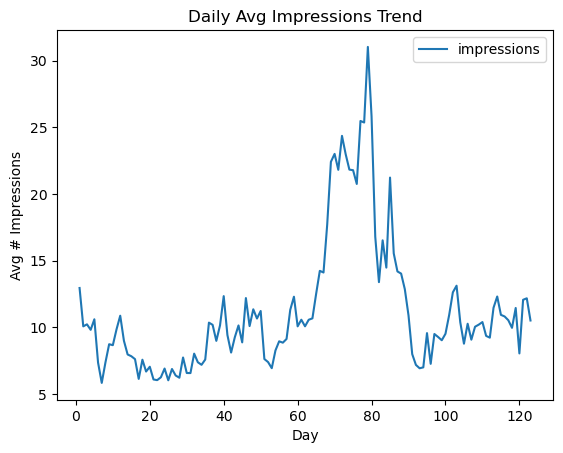

In [50]:
ax = df6.plot(x = 'day', y = 'impressions')
ax.set_xlabel('Day')
ax.set_ylabel('Avg # Impressions')
ax.set_title('Daily Avg Impressions Trend')

Text(0.5, 1.0, 'Daily Avg Clicks Trend')

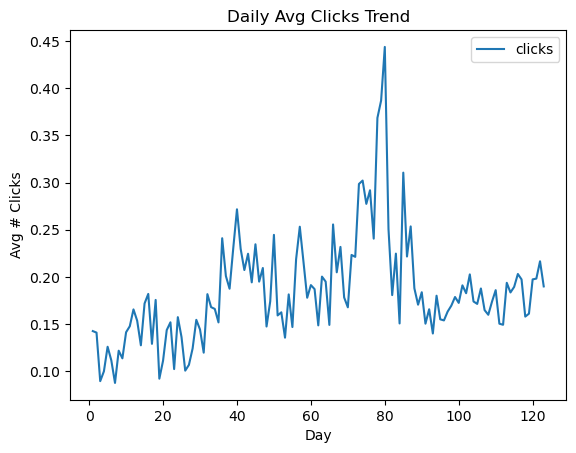

In [51]:
ax = df7.plot(x = 'day', y = 'clicks')
ax.set_xlabel('Day')
ax.set_ylabel('Avg # Clicks')
ax.set_title('Daily Avg Clicks Trend')